In [1]:
import numpy as np

1. 已知矩阵
$$
A = \begin{pmatrix}
1 & 1 \\
2 & 2 \\
0 & 0
\end{pmatrix}
$$

In [2]:
A = np.array([[1,1], [2, 2], [0, 0]])

(1) 求矩阵A的奇异值。

In [3]:
# method 1 (np.linalg.svd)
U, s, VT = np.linalg.svd(A)
s

array([3.16227766e+00, 1.57009246e-16])

In [4]:
# method 2 (np.linalg.eig)
eigenvalue = np.linalg.eig(A @ A.T)[0]
singularValue = np.sqrt(eigenvalue[eigenvalue > 0])
singularValue

array([3.16227766])

In [5]:
# method 3 (handwrite)

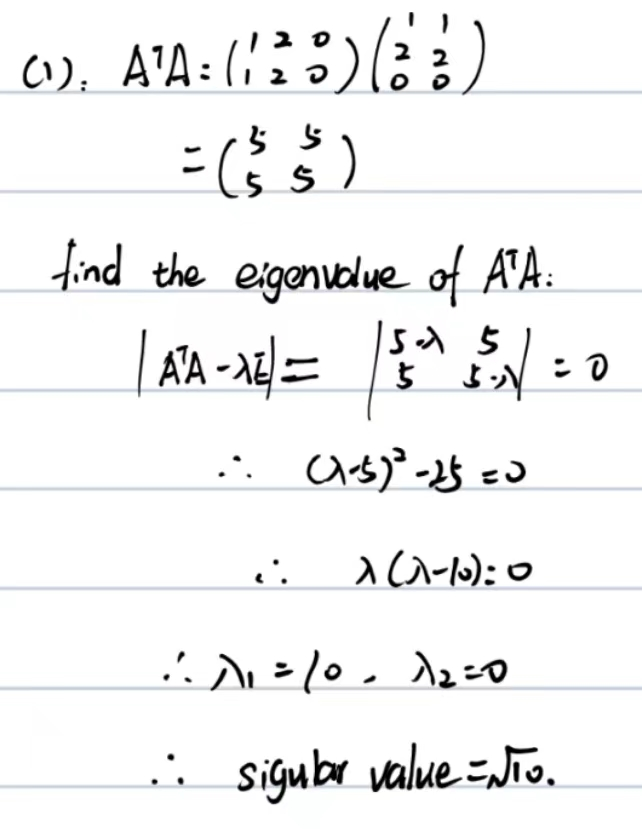

(2)求矩阵A的奇异值分解。

In [12]:
U

array([[-0.4472136 , -0.89442719,  0.        ],
       [-0.89442719,  0.4472136 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [13]:
VT.T

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

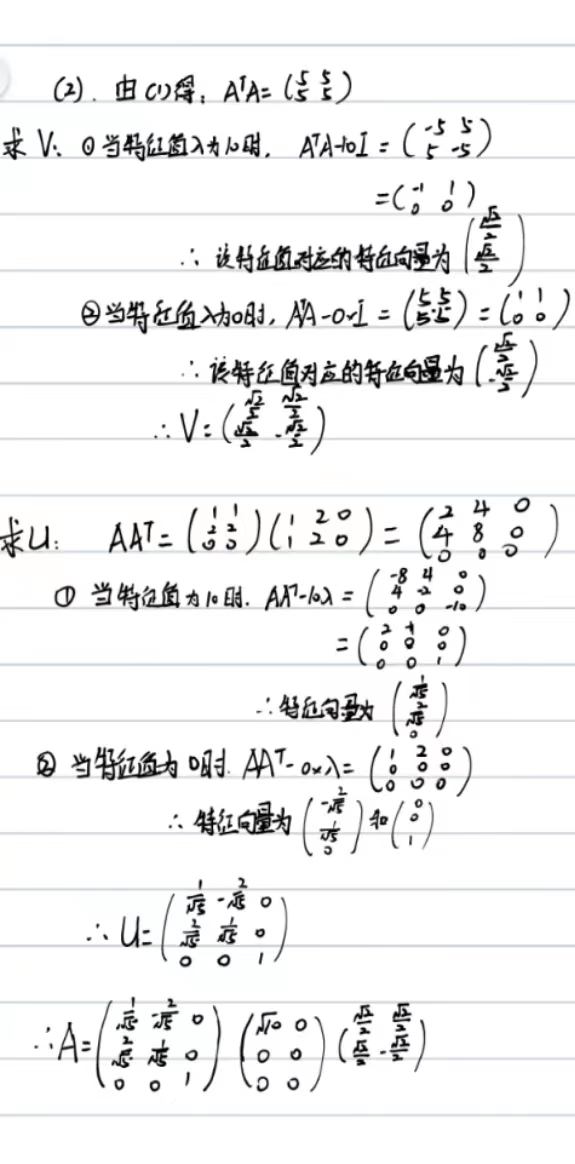

2. 给定表中的三维数据集：

| 数据    | 1     | 2       |    3   |
|----------|---------|-----------|----------|
| x      | 1     |  -1     |     4  |
| y      | 2     | 1      |   3     |
| z      | 1     | 3       | -1     |

(1) 计算数据的协方差矩阵

In [85]:
A = np.array([[1, 2, 1], [-1, 1, 3], [4, 3, -1]])
print(np.cov(A.T))

[[ 6.33333333  2.5        -5.        ]
 [ 2.5         1.         -2.        ]
 [-5.         -2.          4.        ]]


(2) 计算数据的主成分

In [76]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(A)

In [77]:
# method 1: (sklearn library)
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(X)
pca.components_

array([[ 0.57649808,  0.57777589, -0.57777589],
       [-0.8170985 ,  0.4076457 , -0.4076457 ]])

In [87]:
# method 2: (compute eigenvector of covariance matrix)
eigenvalue, eigenvector = np.linalg.eig(np.cov(X.T))

In [83]:
np.cumsum([item/np.sum(eigenvalue) for item in np.sort(eigenvalue)[::-1]])
# so I choose two components whose accuary rate can reach 100%

array([0.99706742, 1.        , 1.        ])

In [84]:
ind = np.argsort(eigenvalue)[::-1][:2]
print(f"the components are \n{eigenvector[:, ind].T}")

the components are 
[[ 0.57649808  0.57777589 -0.57777589]
 [-0.8170985   0.4076457  -0.4076457 ]]


7. 判断下列矩阵是否可对角化：
$$
A = \begin{pmatrix}
1 & -1 \\
3 & -3 
\end{pmatrix}
\\
B = \begin{pmatrix}
2 & 0 & 0 \\
0 & 5 & -2 \\
0 & 6 & -2
\end{pmatrix}
$$

In [39]:
def judgeDiag(matrix):
    eigenvalue = np.linalg.eig(matrix)[0]
    rank = np.linalg.matrix_rank(matrix)
    if len(eigenvalue) == rank:
        print("the matrix can be diagonalizable.")
    else:
        print("the matrix can't be diagnalizable.")

In [40]:
A = np.array([[1,-1], [3, -3]])
judgeDiag(A)

the matrix can't be diagnalizable.


In [41]:
B = np.array([[2,0,0], [0,5,-2], [0,6,-2]])
judgeDiag(B)

the matrix can be diagonalizable.
